# 前言

## 成功學

你想要成功嗎?，你想要賺大錢嗎?，有很多老師會跟你說，你現在的成就如何就看看你身邊的朋友，你現在的成就大概就是你找你身邊 5 個朋友的平均。 <br>
近朱者赤，近墨者黑，這一件事大家很快都會發現你跟環境是互相影響的，古時候有孟母三遷的故事。

## 語言學

在語言的使用上大家也發現這個現象。 <br>
例如: This is a pencil. This is a pen. <br>
在語言的使用上越 詞性 相近會出現在類似的位置，字義相近會出現在相對的位置，其實在數學上也有這種概念


## K Nearest Neighbors

在機器學習上也有用類似的概念


下面是 Nearest Neighbors Classification 不同演算法的例子，以 Iris 資料的前兩個特徵來做分類。


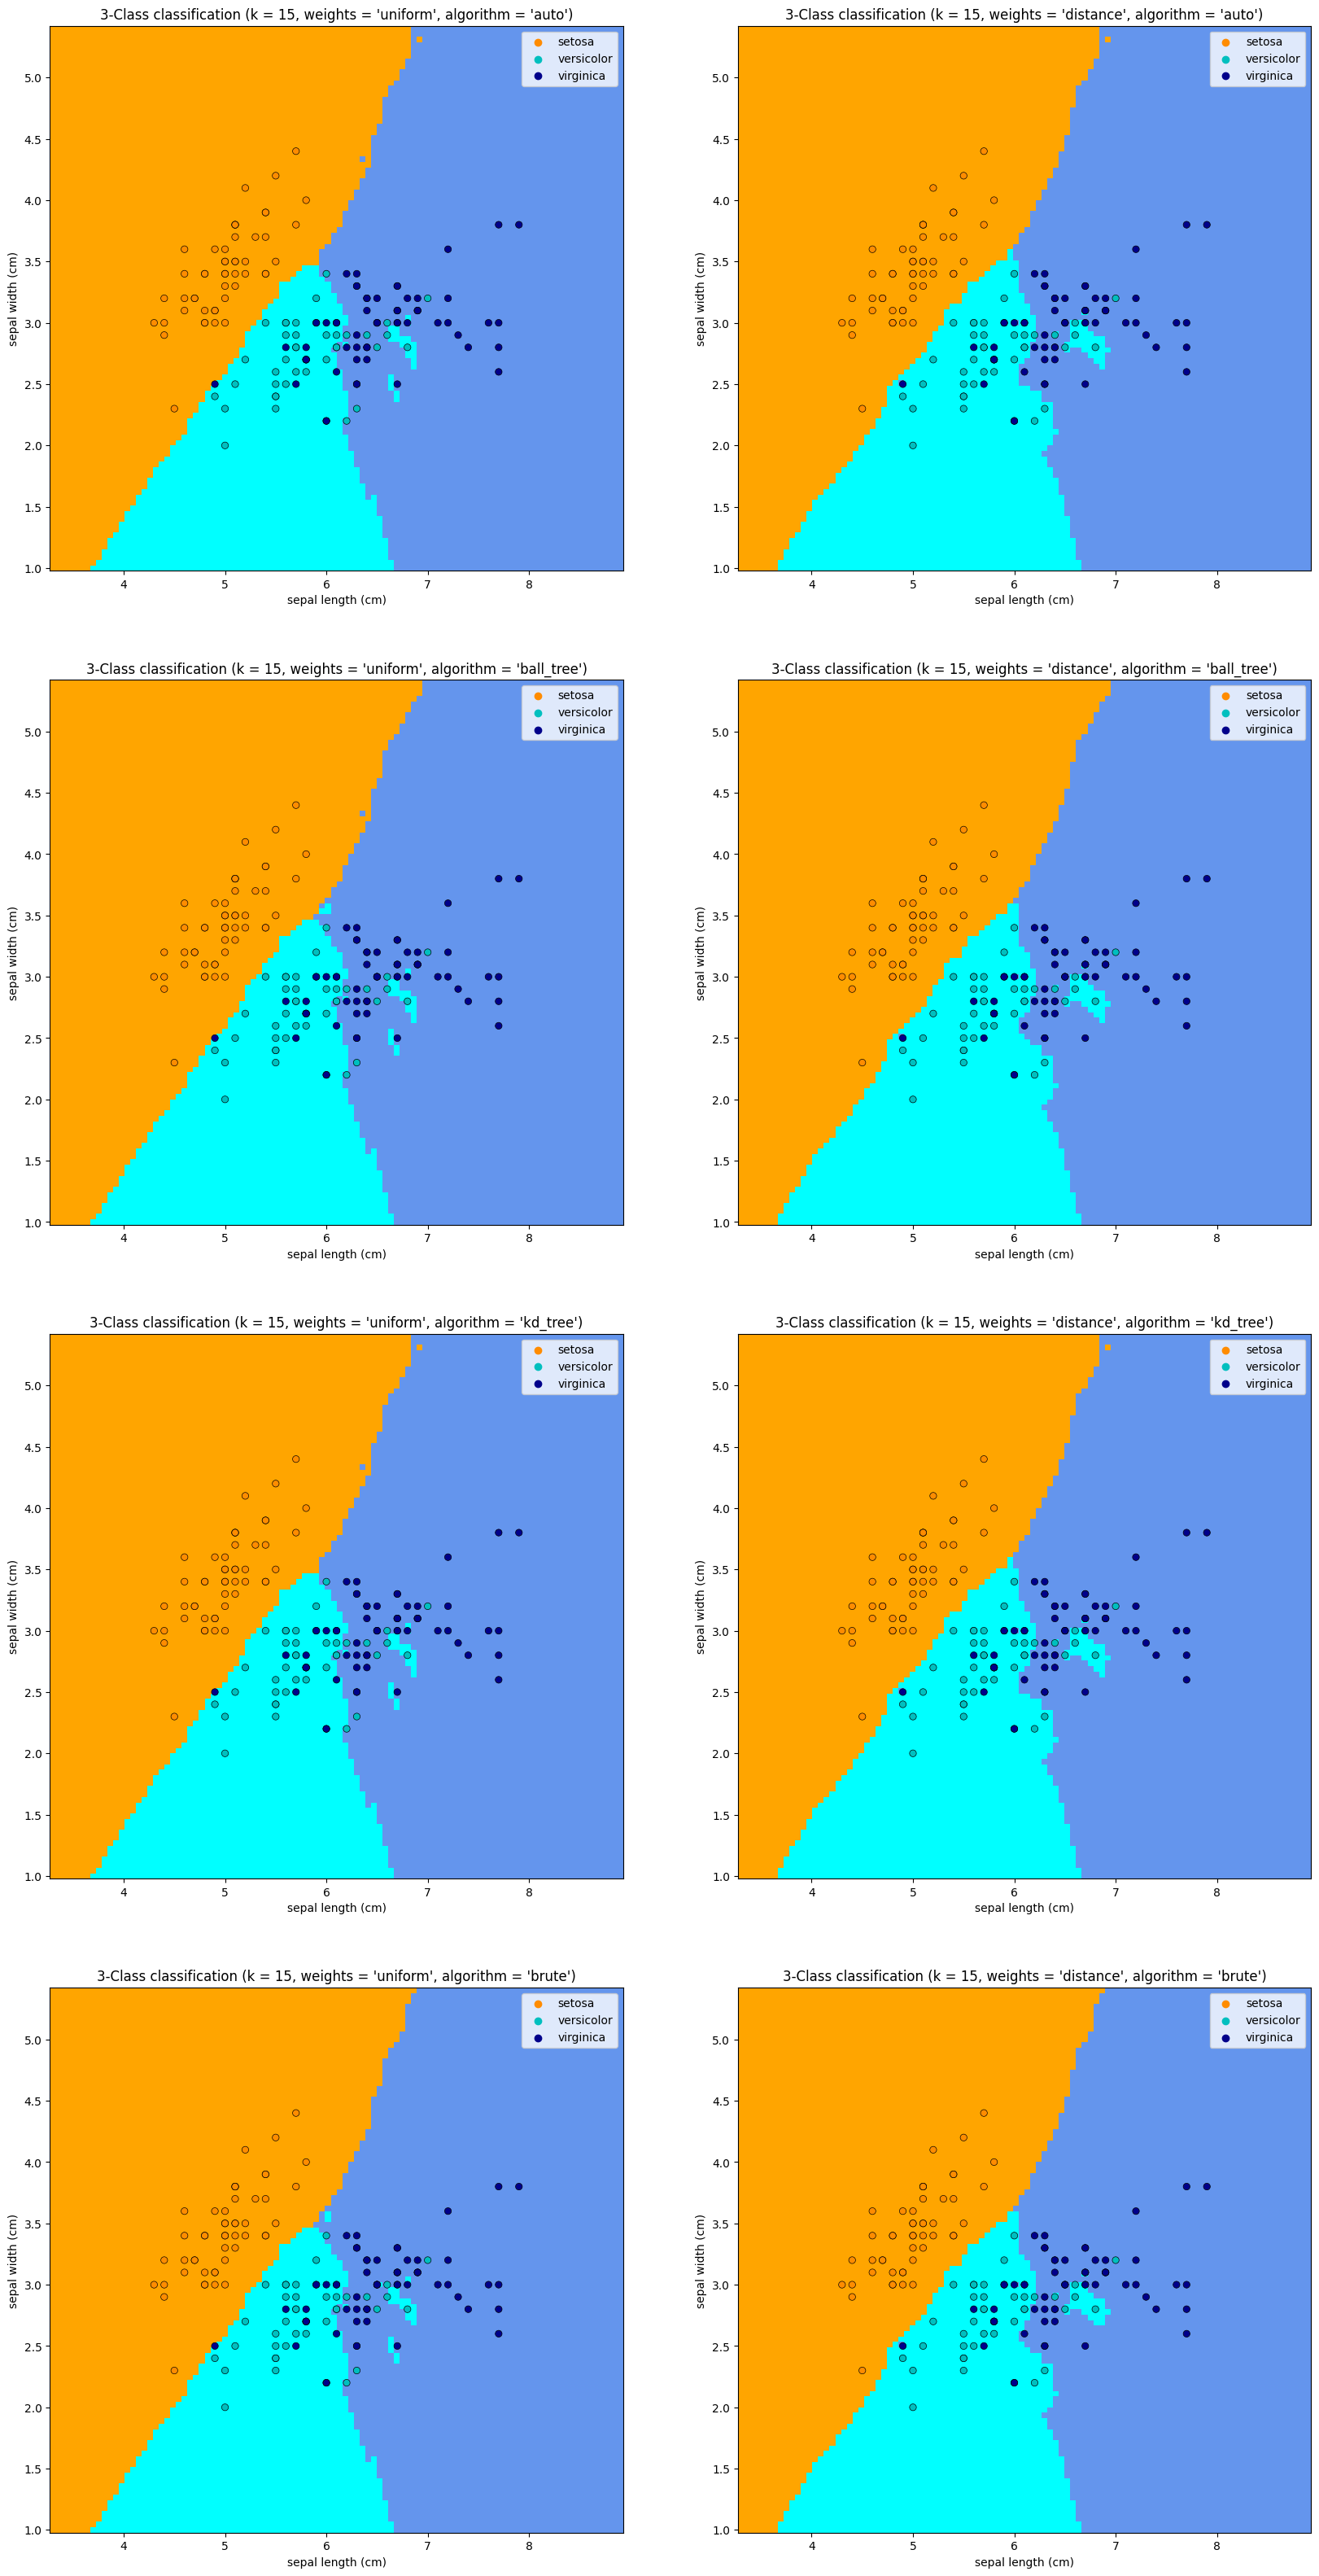

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets
from sklearn.inspection import DecisionBoundaryDisplay
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams['figure.figsize'] = [20, 40]

# 看多少鄰居決定
n_neighbors = 15

# 讀 Iris 資料 
X, y = datasets.load_iris(return_X_y=True)
X = X[:, :2]

# 名子函數
def name_map(x) :
    if x == 0:
        return 'setosa'
    elif x == 1:
        return 'versicolor'
    else:
        return 'virginica'

# 建立顏色 light 背景色 bold 點的顏色
cmap_light = ListedColormap(["orange", "cyan", "cornflowerblue"])
cmap_bold = ["darkorange", "c", "darkblue"]

# weight 參數說明
# "uniform": 鄰居不會跟遠近有關 
# "distance": 跟遠近有關越近影響越大
fig, axis = plt.subplots(4,2)
for i_a, algorithm in enumerate(["auto", "ball_tree", "kd_tree", "brute"]):
    for i_w, weights in enumerate(["uniform", "distance"]):
        
        # 建立模型
        classifier = neighbors.KNeighborsClassifier(n_neighbors, weights=weights, algorithm=algorithm)
        classifier.fit(X, y)

        ax = axis[i_a][i_w]

        DecisionBoundaryDisplay.from_estimator(
            classifier,
            X,
            cmap=cmap_light,
            ax=ax,
            response_method="predict",
            plot_method="pcolormesh",
            xlabel='sepal length (cm)',
            ylabel='sepal width (cm)',
            shading="auto",
        )

        sns.scatterplot(
            x=X[:, 0],
            y=X[:, 1],
            hue=map(name_map, y),
            palette=cmap_bold,
            ax=ax,
            alpha=1.0,
            edgecolor="black",
        )
        ax.set_title(
            "3-Class classification (k = %i, weights = '%s', algorithm = '%s')" % (n_neighbors, weights, algorithm)
        )

plt.show()



# Algorithm

不知道大家留意上面的演算法了嗎? 可以選的參數有 ``auto``, ``ball_tree``, ``kd_tree``, ``brute``，
我們先來說說 ``brute`` 這個方法就是 brute force 俗稱的暴力法，我們先假設我們收集的資料有樣本數 $N$ ，
每個樣本是 $D$ 維，如果我們有一筆資料想要找離他最近的 $k$ 個點，用暴力法就去每個點算一次距離紀錄最近的 $k$ 個點，
要花的時間是 $O(DN)$。

## Tree Architecture

我們可以想像真的很花時間，我們很自然的會想提升效率，
不管在古代或是在現代都有這種想法，方法是什麼就是給編制，我大概查了一下

### 蒙古的軍隊編制
- 10 人為 1 隊
- 10 隊為 1 百戶
- 10 百戶為 1 千戶
- 10 千戶為 1 萬戶

古代皇帝想要知道自己有多少兵是要跑遍自己的領地，一個一個問才會知道自己有多少兵嗎?
我們可以想像這麼做效率奇低，那會怎麼做他會問自己的大將軍，大將軍再問自己的一般將軍或是小將軍，再往下問萬戶長，再往下問千戶等等，
只要問的夠細，再加加兩下不就知道有多少人。 <br>
雖然可能會有誤差與欺瞞等問題，但是這不在我們要討論的問題裡面。

### 台灣軍隊編制 (可能會因時間等因素有誤差)
- 9 人為 1 班
- 4 班為 1 排
- 4 排為 1 連

總統要知道有多少兵可以用，同樣道理他要跑遍台灣一個一個數嗎? <br>
這種階層由上往下的結構就是樹狀結構，如果裡面不存在欺騙，那這種結構在紀錄資料，
增加、刪除、搜尋上都有很高的效率，在你不知道的方方面面樹狀結構都悄悄的藏在其中，
像你用的網頁(HTML)紀錄的文件物件模型（Document Object Model, DOM），就是用樹狀結構，
你每天用的資料庫 SQL 也是用樹狀結構紀錄資料。

### kd_tree
我們回來，現在已經知道 tree 這麼好用，我們要怎麼分階層快速去查找，假設有幾筆資料。

- (1, 1, 1)
- (1, 2, 1)
- (1, 1, 3)
- (2, 1, 1)

你是不是會想到字典排序，沒錯我們很自然的想到可以用維度阿第一維找個代表，第一維找完代表在去找第二維的代表，這樣我們就不用每個都問過，
這種想法就是 K-dimensional tree，但是我們也可以很快發現問題，如果維度越高，要分的階層也越多，效率就會變差，這在我們現實情況也是相同的，
一般來說當 $D$ 維度超過 $20$ 效率就會越來越差。


## Ball_tree
球狀的樹是以球維單位去劃分資料，這種方法數據會跟維度脫鉤，不會因為資料維度 $D$ 提高而快速提高複雜度，
是一種高度結構化的結構。


## 總結

- 如果是小數據( $N$ 小於 $30$ ) 用 brute force 會比樹的結構更快。
- 如果在維度 $D$ 小於 $20$， kd tree 表現良好。


下面進入怎麼找最近的點。


In [2]:
from sklearn.neighbors import NearestNeighbors
import numpy as np

X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
nbrs = NearestNeighbors(n_neighbors=3, algorithm='ball_tree').fit(X)
distances, indices = nbrs.kneighbors(X)

# 離自己最近的三個點，第一個點就是自己
display(indices)

# 那些點的距離，自己離自己的距離就是 0
distances


array([[0, 1, 2],
       [1, 0, 2],
       [2, 1, 0],
       [3, 4, 5],
       [4, 3, 5],
       [5, 4, 3]], dtype=int64)

array([[0.        , 1.        , 2.23606798],
       [0.        , 1.        , 1.41421356],
       [0.        , 1.41421356, 2.23606798],
       [0.        , 1.        , 2.23606798],
       [0.        , 1.        , 1.41421356],
       [0.        , 1.41421356, 2.23606798]])

這邊提一下參數 weights 有兩個可以選 ``uniform``, ``distance`` ， uniform 為每個鄰居分配相同權重， distance 越近權重越大。 <br>

下面我們就來看分類跟回歸的實戰。

In [3]:
from sklearn import neighbors, datasets
from sklearn.model_selection import train_test_split

# 看多少鄰居決定
n_neighbors = 15


X, y = datasets.load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=87)

classifier = neighbors.KNeighborsClassifier(n_neighbors, weights="distance", algorithm="auto").fit(X_train, y_train)

print('Training accuracy: ', classifier.score(X_train, y_train))
print('Testing accuracy: ', classifier.score(X_test, y_test))


Training accuracy:  1.0
Testing accuracy:  0.9666666666666667


In [4]:

from sklearn import neighbors, datasets
from sklearn.metrics import mean_squared_error

X, y = datasets.load_diabetes(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=87)

regresser = neighbors.KNeighborsRegressor(n_neighbors, weights="distance", algorithm="auto").fit(X_train, y_train)

y_pred = regresser.predict(X_test)
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))



Mean squared error: 3051.63


下面用 KNeighborsRegressor 來看看效果如何。

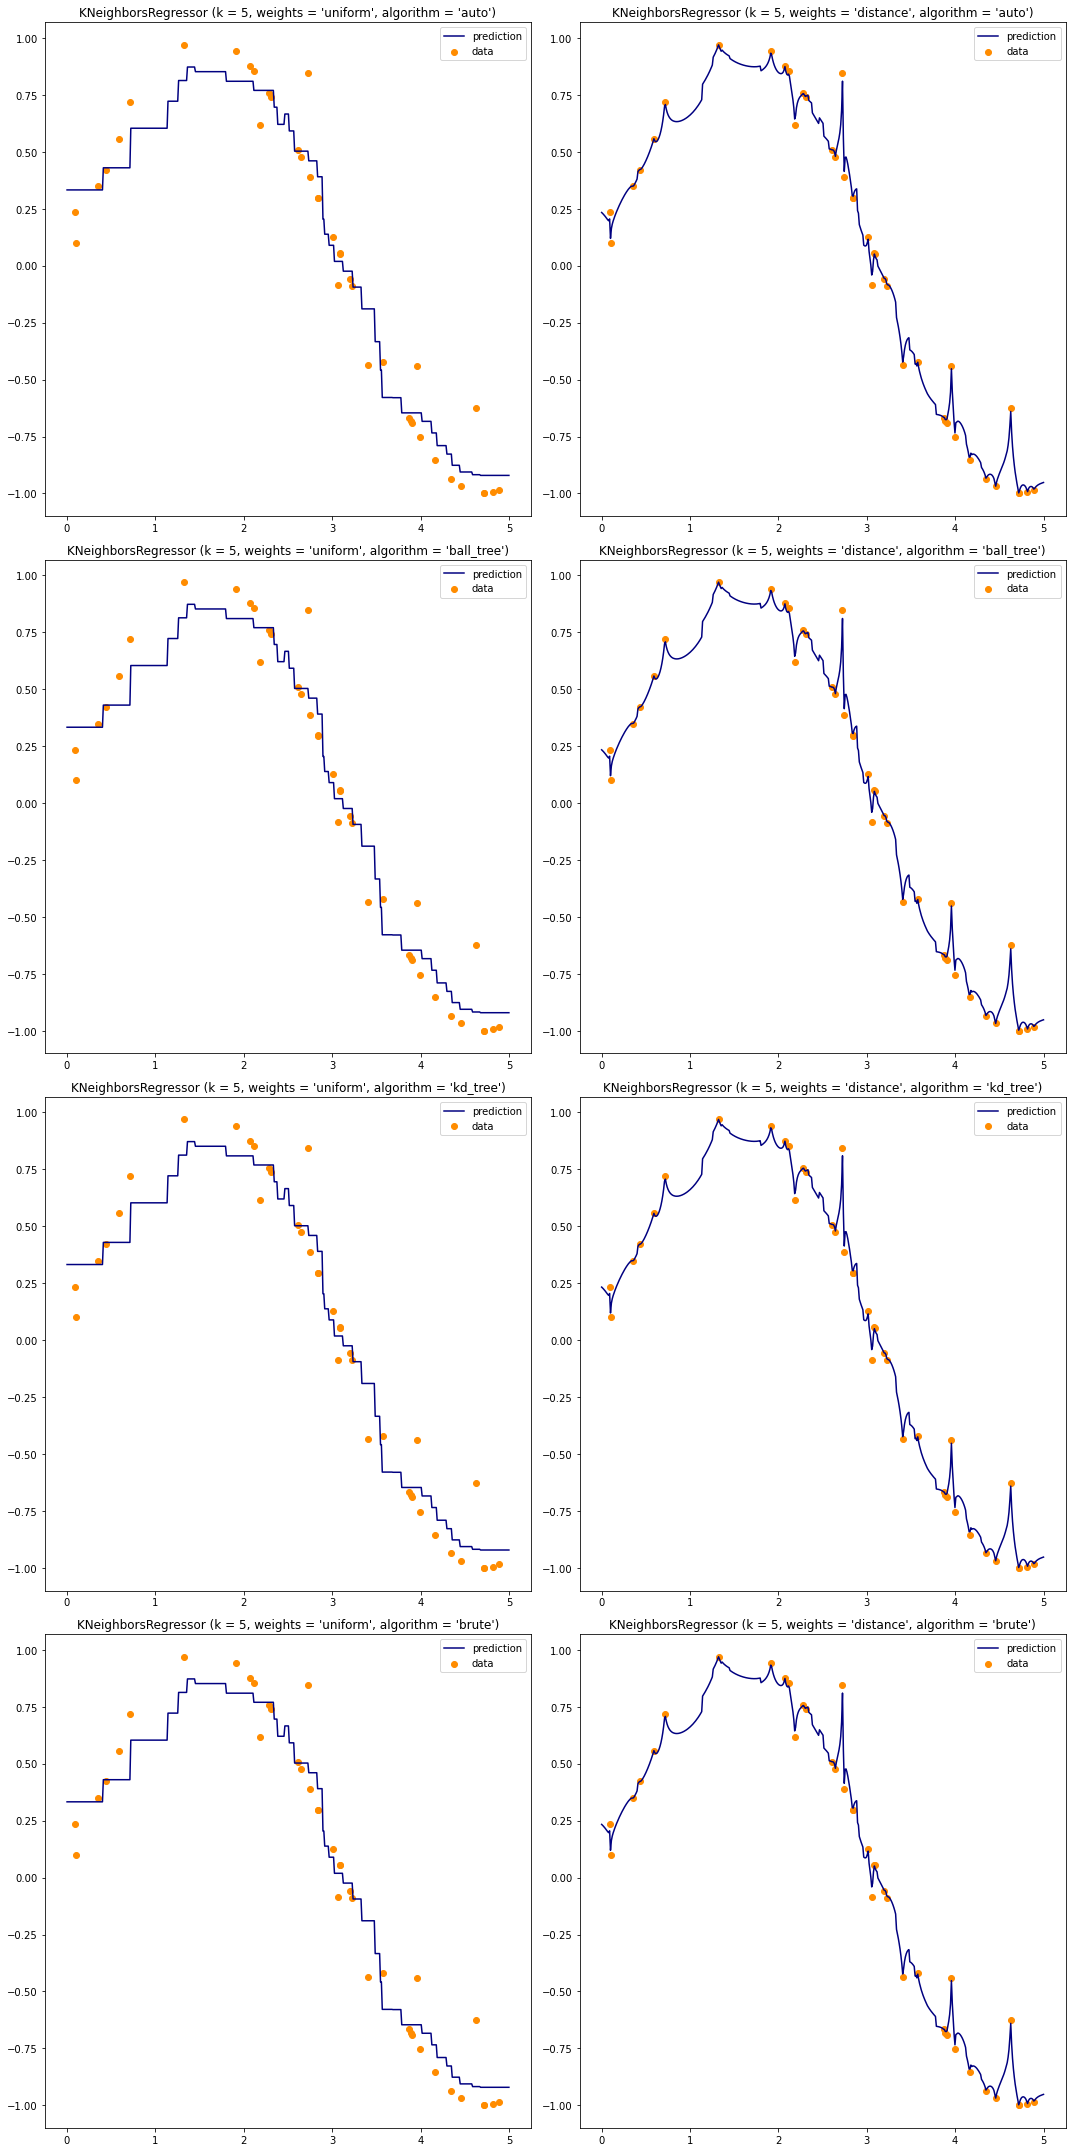

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import neighbors
%matplotlib inline
plt.rcParams['figure.figsize'] = [15, 30]


np.random.seed(0)
X = np.sort(5 * np.random.rand(40, 1), axis=0)
T = np.linspace(0, 5, 500)[:, np.newaxis]
y = np.sin(X).ravel()

# 加干擾
y[::5] += 1 * (0.5 - np.random.rand(8))

# 看多少鄰居決定
n_neighbors = 5

fig, axis = plt.subplots(4,2)
for i_a, algorithm in enumerate(["auto", "ball_tree", "kd_tree", "brute"]):
    for i_w, weights in enumerate(["uniform", "distance"]):
        regresser = neighbors.KNeighborsRegressor(n_neighbors, weights=weights, algorithm=algorithm)
        y_pred = regresser.fit(X, y).predict(T)

        ax = axis[i_a][i_w]
        ax.scatter(X, y, color="darkorange", label="data")
        ax.plot(T, y_pred, color="navy", label="prediction")
        ax.axis("tight")
        ax.legend()
        ax.set_title("KNeighborsRegressor (k = %i, weights = '%s', algorithm = '%s')" % (n_neighbors, weights, algorithm))

plt.tight_layout()
plt.show()

